# The Sparks Foundation - Graduate Rotational Internship Program (2020)
### Eshita Goel

## Task - 3
## Exploring Unsupervised Machine Learning

We will be exploring the basics of K-Means Clustering Algorithm which is a part of Unsupervised Learning

## Step 1: Importing the libraries 
We will first import the various libraries that we would use for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Loading the data
We will work on the popular <b>'iris'</b> dataset for this project. We can load this dataset from the sklearn library

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = df.loc[:].values

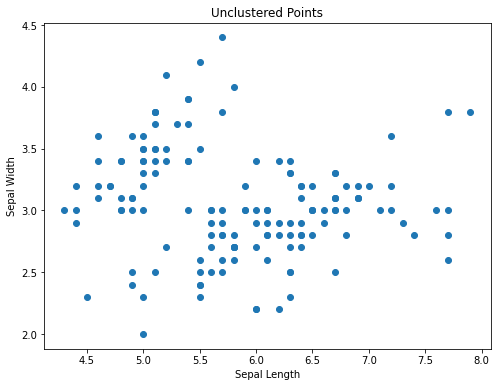

In [4]:
# Plotting the points
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Unclustered Points")
plt.show()

## Step 3: Choosing the right k for the K Means Clustering
We will be using "The Elbow Method" to  choose the right k for the K Means Clustering algorithm

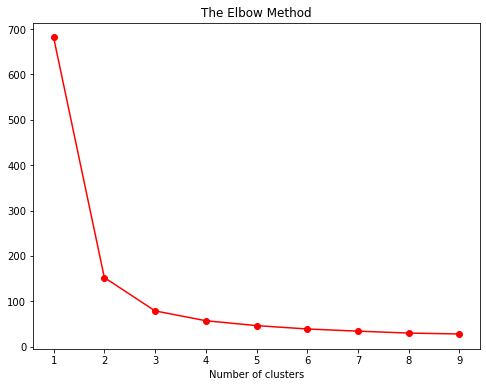

In [5]:
from sklearn.cluster import KMeans
inert = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 9, random_state = 0)
    kmeans.fit(X)
    inert.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.figure(figsize=(8,6))
plt.plot(range(1, 10), inert, marker="o",c="r")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

### Observation:
The elbow is clearly identified at k=3

In [6]:
# Keeping k = 3, we perform  clustering on our data

clus = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_clus = clus.fit_predict(X)

y_clus

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

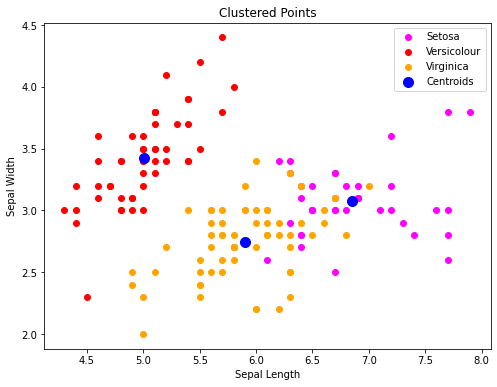

In [7]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(8,6))
plt.scatter(X[y_clus == 0, 0], X[y_clus == 0, 1], 
             c = 'magenta', label = 'Setosa')
plt.scatter(X[y_clus == 1, 0], X[y_clus == 1, 1], 
             c = 'red', label = 'Versicolour')
plt.scatter(X[y_clus == 2, 0], X[y_clus == 2, 1],
             c = 'orange', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(clus.cluster_centers_[:, 0], clus.cluster_centers_[:,1], 
             c = 'blue', label = 'Centroids',s=100)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Clustered Points")

plt.legend()
plt.show()